Importing the Dependencies

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

DATA COLLECTION AND PROCESSSING

In [71]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')


In [72]:
# inspeacting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [73]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [74]:
# getting some information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [75]:
# checking the number of missing value
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [77]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categoritical data

In [80]:
# encoding "fuel" Column 
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column 
car_dataset.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

# encoding "Transmission" Column 
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [81]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0


Splitting the Data into Training Data

In [83]:
X  = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y  = car_dataset['Selling_Price']

In [84]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            1             0   
1    2013           9.54       43000          1            1             0   
2    2017           9.85        6900          0            1             0   
3    2011           4.15        5200          0            1             0   
4    2014           6.87       42450          1            1             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            1             0   
297  2015           5.90       60000          0            1             0   
298  2009          11.00       87934          0            1             0   
299  2017          12.50        9000          1            1             0   
300  2016           5.90        5464          0            1             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [85]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test Data

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state=2)

MODEL TRAINING

1.LINEAR REGRESSION

In [87]:
#loading the linear regression model 
lin_reg_model = LinearRegression()

In [88]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [89]:
# prediction on Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [90]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8799451660493711


Visiulaize the actual prices and predicted prices on the basis of Training Data

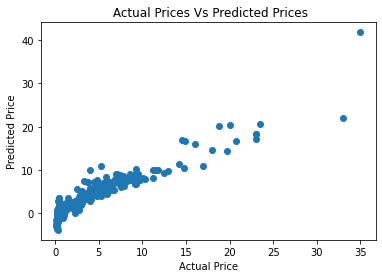

In [91]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices Vs Predicted Prices")
plt.show()

In [92]:
# prediction on Testing Data
test_data_prediction = lin_reg_model.predict(X_test)

In [93]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8365766715027051


Visiulaize the actual prices and predicted prices on the basis of Test Data

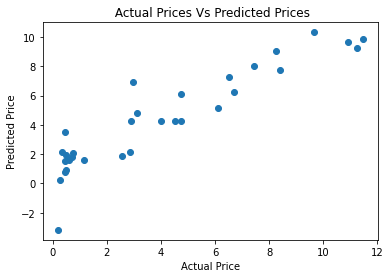

In [33]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices Vs Predicted Prices")
plt.show()